In [6]:
import findspark
import pandas as pd



In [27]:
import pandas as pd
anual_data = pd.read_csv('C:\\Users\\yhoz\\Documents\\dataanalytics.predictive\\data\\datos_validados\\anual_data_18.csv', delimiter=";")

In [28]:
anual_data.info()
df_anual_data=anual_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700800 entries, 0 to 700799
Data columns (total 32 columns):
ID_SEGMENTO           691668 non-null float64
COD_LABORALIDAD       691668 non-null float64
FECHA                 691668 non-null object
MES                   691668 non-null float64
HORA                  691668 non-null float64
MINUTO                691668 non-null float64
CANTIDAD_PREC         691668 non-null float64
TOTAL_VEHICULOS       691668 non-null float64
TOTAL_VEHICULOS_1     691668 non-null float64
TOTAL_VEHICULOS_2     691668 non-null float64
TOTAL_VEHICULOS_3     691668 non-null float64
TOTAL_VEHICULOS_4     691668 non-null float64
TOTAL_VEHICULOS_5     691668 non-null float64
TOTAL_VEHICULOS_6     691668 non-null float64
TOTAL_VEHICULOS_7     691668 non-null float64
TOTAL_VEHICULOS_8     691668 non-null float64
TOTAL_VEHICULOS_9     691668 non-null float64
TOTAL_VEHICULOS_10    691668 non-null float64
TOTAL_VEHICULOS_11    691668 non-null float64
TOTAL_VEHICULOS_

In [29]:
print(df_anual_data.isnull().any().sum())
df_anual_data = df_anual_data.dropna(how='any')
df_anual_data["TOTAL_VEHICULOS"].fillna(df_anual_data["TOTAL_VEHICULOS"].mean(),inplace=True)

32


In [30]:
df_anual_data['FECHA'] = pd.to_datetime(df_anual_data['FECHA'])
df_anual_data.info()

c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 691668 entries, 0 to 700799
Data columns (total 32 columns):
ID_SEGMENTO           691668 non-null float64
COD_LABORALIDAD       691668 non-null float64
FECHA                 691668 non-null datetime64[ns]
MES                   691668 non-null float64
HORA                  691668 non-null float64
MINUTO                691668 non-null float64
CANTIDAD_PREC         691668 non-null float64
TOTAL_VEHICULOS       691668 non-null float64
TOTAL_VEHICULOS_1     691668 non-null float64
TOTAL_VEHICULOS_2     691668 non-null float64
TOTAL_VEHICULOS_3     691668 non-null float64
TOTAL_VEHICULOS_4     691668 non-null float64
TOTAL_VEHICULOS_5     691668 non-null float64
TOTAL_VEHICULOS_6     691668 non-null float64
TOTAL_VEHICULOS_7     691668 non-null float64
TOTAL_VEHICULOS_8     691668 non-null float64
TOTAL_VEHICULOS_9     691668 non-null float64
TOTAL_VEHICULOS_10    691668 non-null float64
TOTAL_VEHICULOS_11    691668 non-null float64
TOTAL_VE

In [31]:
from datetime import datetime, timedelta 
df_anual_data['TIME'] = pd.to_datetime(df_anual_data['FECHA']).map(lambda x: x.strftime('%H:%M:%S'))
df_anual_data.TIME[:5]


c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0    00:00:00
1    00:00:00
2    00:00:00
3    00:00:00
4    00:00:00
Name: TIME, dtype: object

### Generate Training Datasets

In [32]:
months = df_anual_data.FECHA.dt.month.unique()
segments = df_anual_data.ID_SEGMENTO.unique()
codes = df_anual_data.COD_LABORALIDAD.unique()

print("Months " + str(months))
print("Segments " + str(segments))
print("Codes " + str(codes))

total_trainsets = len(months) * len(segments) * len(codes)
print("Number of training sets: " + str(total_trainsets))

Months [ 8  7 10 12  5  3  1  9  6 11  4  2]
Segments [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20.]
Codes [4. 5. 6. 7. 1. 2. 3.]
Number of training sets: 1680


In [33]:
rows_per_day=int(((60/15)*24))

training_sets = {'ID_SEGMENT':[], 'MES':[], 'COD_LABORALIDAD':[], 'TRAINING_SET':[] }
for seg_id in segments: # 1) Particionar anual_data por segmento
    df_seg = df_anual_data.loc[df_anual_data.ID_SEGMENTO==seg_id]
    for month_i in df_seg.FECHA.dt.month.unique(): # 2) Dividir mensual_data en 12 datasets 
        df_month_seg = df_seg.loc[df_seg.FECHA.dt.month==month_i]
        for code_i in df_month_seg.COD_LABORALIDAD.unique(): # 3) Particionar por dias con mismo código de lab
            df_month_seg_code = df_month_seg.loc[df_month_seg.COD_LABORALIDAD==code_i]
                
            # Fill training_sets dictionary
            
            training_sets['ID_SEGMENT'].append(seg_id)
            training_sets['MES'].append(month_i)
            training_sets['COD_LABORALIDAD'].append(code_i)
            training_sets['TRAINING_SET'].append(df_month_seg_code)
            

In [34]:
for row in range(0,total_trainsets):
    print("----------------------------> TRAINING SET NUMBER: " + str(row))
    print("SEGMENTO " + str(training_sets['ID_SEGMENT'][row]))
    print("MES " + str(training_sets['MES'][row]))
    print("COD_LABORALIDAD " + str(training_sets['COD_LABORALIDAD'][row]))
    print("DAYS IN TRAINING_SET: " + str(training_sets['TRAINING_SET'][row].FECHA.dt.day.unique()))

----------------------------> TRAINING SET NUMBER: 0
SEGMENTO 1.0
MES 8
COD_LABORALIDAD 4.0
DAYS IN TRAINING_SET: [ 1  8 15 22 29]
----------------------------> TRAINING SET NUMBER: 1
SEGMENTO 1.0
MES 8
COD_LABORALIDAD 5.0
DAYS IN TRAINING_SET: [ 2  9 16 23 30]
----------------------------> TRAINING SET NUMBER: 2
SEGMENTO 1.0
MES 8
COD_LABORALIDAD 6.0
DAYS IN TRAINING_SET: [ 3 10 17 24 31]
----------------------------> TRAINING SET NUMBER: 3
SEGMENTO 1.0
MES 8
COD_LABORALIDAD 7.0
DAYS IN TRAINING_SET: [ 4 11 18 25]
----------------------------> TRAINING SET NUMBER: 4
SEGMENTO 1.0
MES 8
COD_LABORALIDAD 1.0
DAYS IN TRAINING_SET: [ 5 12 19 26]
----------------------------> TRAINING SET NUMBER: 5
SEGMENTO 1.0
MES 8
COD_LABORALIDAD 2.0
DAYS IN TRAINING_SET: [ 6 13 20 27]
----------------------------> TRAINING SET NUMBER: 6
SEGMENTO 1.0
MES 8
COD_LABORALIDAD 3.0
DAYS IN TRAINING_SET: [ 7 14 21 28]
----------------------------> TRAINING SET NUMBER: 7
SEGMENTO 1.0
MES 7
COD_LABORALIDAD 1.0
DAY

DAYS IN TRAINING_SET: [ 9 16 23 30  2]
----------------------------> TRAINING SET NUMBER: 118
SEGMENTO 2.0
MES 5
COD_LABORALIDAD 5.0
DAYS IN TRAINING_SET: [10 17 24 31  3]
----------------------------> TRAINING SET NUMBER: 119
SEGMENTO 2.0
MES 3
COD_LABORALIDAD 5.0
DAYS IN TRAINING_SET: [ 1  8 15 22 29]
----------------------------> TRAINING SET NUMBER: 120
SEGMENTO 2.0
MES 3
COD_LABORALIDAD 6.0
DAYS IN TRAINING_SET: [ 2  9 16 23 30]
----------------------------> TRAINING SET NUMBER: 121
SEGMENTO 2.0
MES 3
COD_LABORALIDAD 7.0
DAYS IN TRAINING_SET: [ 3 10 17 24 31]
----------------------------> TRAINING SET NUMBER: 122
SEGMENTO 2.0
MES 3
COD_LABORALIDAD 1.0
DAYS IN TRAINING_SET: [ 4 11 18 25]
----------------------------> TRAINING SET NUMBER: 123
SEGMENTO 2.0
MES 3
COD_LABORALIDAD 2.0
DAYS IN TRAINING_SET: [ 5 12 19 26]
----------------------------> TRAINING SET NUMBER: 124
SEGMENTO 2.0
MES 3
COD_LABORALIDAD 3.0
DAYS IN TRAINING_SET: [ 6 13 20 27]
----------------------------> TRAINING 

DAYS IN TRAINING_SET: [ 1 22 29  8 15]
----------------------------> TRAINING SET NUMBER: 225
SEGMENTO 3.0
MES 6
COD_LABORALIDAD 4.0
DAYS IN TRAINING_SET: [20 27  6 13]
----------------------------> TRAINING SET NUMBER: 226
SEGMENTO 3.0
MES 6
COD_LABORALIDAD 5.0
DAYS IN TRAINING_SET: [21 28  7 14]
----------------------------> TRAINING SET NUMBER: 227
SEGMENTO 3.0
MES 6
COD_LABORALIDAD 7.0
DAYS IN TRAINING_SET: [23 30  2  9 16]
----------------------------> TRAINING SET NUMBER: 228
SEGMENTO 3.0
MES 6
COD_LABORALIDAD 1.0
DAYS IN TRAINING_SET: [24  3 10 17]
----------------------------> TRAINING SET NUMBER: 229
SEGMENTO 3.0
MES 6
COD_LABORALIDAD 2.0
DAYS IN TRAINING_SET: [25  4 11 18]
----------------------------> TRAINING SET NUMBER: 230
SEGMENTO 3.0
MES 6
COD_LABORALIDAD 3.0
DAYS IN TRAINING_SET: [26  5 12 19]
----------------------------> TRAINING SET NUMBER: 231
SEGMENTO 3.0
MES 11
COD_LABORALIDAD 5.0
DAYS IN TRAINING_SET: [ 1  8 15 22 29]
----------------------------> TRAINING SET N

DAYS IN TRAINING_SET: [ 1  8 15 22 29]
----------------------------> TRAINING SET NUMBER: 337
SEGMENTO 5.0
MES 8
COD_LABORALIDAD 5.0
DAYS IN TRAINING_SET: [ 2  9 16 23 30]
----------------------------> TRAINING SET NUMBER: 338
SEGMENTO 5.0
MES 8
COD_LABORALIDAD 6.0
DAYS IN TRAINING_SET: [ 3 10 17 24 31]
----------------------------> TRAINING SET NUMBER: 339
SEGMENTO 5.0
MES 8
COD_LABORALIDAD 7.0
DAYS IN TRAINING_SET: [ 4 11 18 25]
----------------------------> TRAINING SET NUMBER: 340
SEGMENTO 5.0
MES 8
COD_LABORALIDAD 1.0
DAYS IN TRAINING_SET: [ 5 12 19 26]
----------------------------> TRAINING SET NUMBER: 341
SEGMENTO 5.0
MES 8
COD_LABORALIDAD 2.0
DAYS IN TRAINING_SET: [ 6 13 20 27]
----------------------------> TRAINING SET NUMBER: 342
SEGMENTO 5.0
MES 8
COD_LABORALIDAD 3.0
DAYS IN TRAINING_SET: [ 7 14 21 28]
----------------------------> TRAINING SET NUMBER: 343
SEGMENTO 5.0
MES 7
COD_LABORALIDAD 1.0
DAYS IN TRAINING_SET: [ 1  8 15 22 29]
----------------------------> TRAINING SET

COD_LABORALIDAD 1.0
DAYS IN TRAINING_SET: [ 6 13 20 27]
----------------------------> TRAINING SET NUMBER: 452
SEGMENTO 6.0
MES 5
COD_LABORALIDAD 2.0
DAYS IN TRAINING_SET: [ 7 14 21 28]
----------------------------> TRAINING SET NUMBER: 453
SEGMENTO 6.0
MES 5
COD_LABORALIDAD 4.0
DAYS IN TRAINING_SET: [ 9 16 23 30  2]
----------------------------> TRAINING SET NUMBER: 454
SEGMENTO 6.0
MES 5
COD_LABORALIDAD 5.0
DAYS IN TRAINING_SET: [10 17 24 31  3]
----------------------------> TRAINING SET NUMBER: 455
SEGMENTO 6.0
MES 3
COD_LABORALIDAD 5.0
DAYS IN TRAINING_SET: [ 1  8 15 22 29]
----------------------------> TRAINING SET NUMBER: 456
SEGMENTO 6.0
MES 3
COD_LABORALIDAD 6.0
DAYS IN TRAINING_SET: [ 2  9 16 23 30]
----------------------------> TRAINING SET NUMBER: 457
SEGMENTO 6.0
MES 3
COD_LABORALIDAD 7.0
DAYS IN TRAINING_SET: [ 3 10 17 24 31]
----------------------------> TRAINING SET NUMBER: 458
SEGMENTO 6.0
MES 3
COD_LABORALIDAD 1.0
DAYS IN TRAINING_SET: [ 4 11 18 25]
-------------------

DAYS IN TRAINING_SET: [ 7 14 21 28]
----------------------------> TRAINING SET NUMBER: 574
SEGMENTO 7.0
MES 4
COD_LABORALIDAD 1.0
DAYS IN TRAINING_SET: [ 1  8 15 22 29]
----------------------------> TRAINING SET NUMBER: 575
SEGMENTO 7.0
MES 4
COD_LABORALIDAD 2.0
DAYS IN TRAINING_SET: [ 2  9 16 23 30]
----------------------------> TRAINING SET NUMBER: 576
SEGMENTO 7.0
MES 4
COD_LABORALIDAD 3.0
DAYS IN TRAINING_SET: [ 3 10 17 24]
----------------------------> TRAINING SET NUMBER: 577
SEGMENTO 7.0
MES 4
COD_LABORALIDAD 4.0
DAYS IN TRAINING_SET: [ 4 11 18 25]
----------------------------> TRAINING SET NUMBER: 578
SEGMENTO 7.0
MES 4
COD_LABORALIDAD 5.0
DAYS IN TRAINING_SET: [ 5 12 19 26]
----------------------------> TRAINING SET NUMBER: 579
SEGMENTO 7.0
MES 4
COD_LABORALIDAD 6.0
DAYS IN TRAINING_SET: [ 6 13 20 27]
----------------------------> TRAINING SET NUMBER: 580
SEGMENTO 7.0
MES 4
COD_LABORALIDAD 7.0
DAYS IN TRAINING_SET: [ 7 14 21 28]
----------------------------> TRAINING SET NUMBE

DAYS IN TRAINING_SET: [ 2  9 16 23 30]
----------------------------> TRAINING SET NUMBER: 681
SEGMENTO 9.0
MES 7
COD_LABORALIDAD 3.0
DAYS IN TRAINING_SET: [ 3 10 17 24 31]
----------------------------> TRAINING SET NUMBER: 682
SEGMENTO 9.0
MES 7
COD_LABORALIDAD 4.0
DAYS IN TRAINING_SET: [ 4 11 18 25]
----------------------------> TRAINING SET NUMBER: 683
SEGMENTO 9.0
MES 7
COD_LABORALIDAD 5.0
DAYS IN TRAINING_SET: [ 5 12 19 26]
----------------------------> TRAINING SET NUMBER: 684
SEGMENTO 9.0
MES 7
COD_LABORALIDAD 6.0
DAYS IN TRAINING_SET: [ 6 13 20 27]
----------------------------> TRAINING SET NUMBER: 685
SEGMENTO 9.0
MES 7
COD_LABORALIDAD 7.0
DAYS IN TRAINING_SET: [ 7 14 21 28]
----------------------------> TRAINING SET NUMBER: 686
SEGMENTO 9.0
MES 10
COD_LABORALIDAD 2.0
DAYS IN TRAINING_SET: [ 1  8 15 22 29]
----------------------------> TRAINING SET NUMBER: 687
SEGMENTO 9.0
MES 10
COD_LABORALIDAD 3.0
DAYS IN TRAINING_SET: [ 2  9 16 23 30]
----------------------------> TRAINING S

----------------------------> TRAINING SET NUMBER: 787
SEGMENTO 10.0
MES 5
COD_LABORALIDAD 1.0
DAYS IN TRAINING_SET: [ 6 13 20 27]
----------------------------> TRAINING SET NUMBER: 788
SEGMENTO 10.0
MES 5
COD_LABORALIDAD 2.0
DAYS IN TRAINING_SET: [ 7 14 21 28]
----------------------------> TRAINING SET NUMBER: 789
SEGMENTO 10.0
MES 5
COD_LABORALIDAD 4.0
DAYS IN TRAINING_SET: [ 9 16 23 30  2]
----------------------------> TRAINING SET NUMBER: 790
SEGMENTO 10.0
MES 5
COD_LABORALIDAD 5.0
DAYS IN TRAINING_SET: [10 17 24 31  3]
----------------------------> TRAINING SET NUMBER: 791
SEGMENTO 10.0
MES 3
COD_LABORALIDAD 5.0
DAYS IN TRAINING_SET: [ 1  8 15 22 29]
----------------------------> TRAINING SET NUMBER: 792
SEGMENTO 10.0
MES 3
COD_LABORALIDAD 6.0
DAYS IN TRAINING_SET: [ 2  9 16 23 30]
----------------------------> TRAINING SET NUMBER: 793
SEGMENTO 10.0
MES 3
COD_LABORALIDAD 7.0
DAYS IN TRAINING_SET: [ 3 10 17 24 31]
----------------------------> TRAINING SET NUMBER: 794
SEGMENTO 10.0

DAYS IN TRAINING_SET: [ 1  8 15 22 29]
----------------------------> TRAINING SET NUMBER: 904
SEGMENTO 11.0
MES 11
COD_LABORALIDAD 6.0
DAYS IN TRAINING_SET: [ 2  9 16 23 30]
----------------------------> TRAINING SET NUMBER: 905
SEGMENTO 11.0
MES 11
COD_LABORALIDAD 7.0
DAYS IN TRAINING_SET: [ 3 10 17 24]
----------------------------> TRAINING SET NUMBER: 906
SEGMENTO 11.0
MES 11
COD_LABORALIDAD 1.0
DAYS IN TRAINING_SET: [ 4 11 18 25]
----------------------------> TRAINING SET NUMBER: 907
SEGMENTO 11.0
MES 11
COD_LABORALIDAD 2.0
DAYS IN TRAINING_SET: [ 5 12 19 26]
----------------------------> TRAINING SET NUMBER: 908
SEGMENTO 11.0
MES 11
COD_LABORALIDAD 3.0
DAYS IN TRAINING_SET: [ 6 13 20 27]
----------------------------> TRAINING SET NUMBER: 909
SEGMENTO 11.0
MES 11
COD_LABORALIDAD 4.0
DAYS IN TRAINING_SET: [ 7 14 21 28]
----------------------------> TRAINING SET NUMBER: 910
SEGMENTO 11.0
MES 4
COD_LABORALIDAD 1.0
DAYS IN TRAINING_SET: [ 1  8 15 22 29]
----------------------------> TR

DAYS IN TRAINING_SET: [ 1  8 15 22 29]
----------------------------> TRAINING SET NUMBER: 1023
SEGMENTO 13.0
MES 10
COD_LABORALIDAD 3.0
DAYS IN TRAINING_SET: [ 2  9 16 23 30]
----------------------------> TRAINING SET NUMBER: 1024
SEGMENTO 13.0
MES 10
COD_LABORALIDAD 4.0
DAYS IN TRAINING_SET: [ 3 10 17 24 31]
----------------------------> TRAINING SET NUMBER: 1025
SEGMENTO 13.0
MES 10
COD_LABORALIDAD 5.0
DAYS IN TRAINING_SET: [ 4 11 18 25]
----------------------------> TRAINING SET NUMBER: 1026
SEGMENTO 13.0
MES 10
COD_LABORALIDAD 6.0
DAYS IN TRAINING_SET: [ 5 12 19 26]
----------------------------> TRAINING SET NUMBER: 1027
SEGMENTO 13.0
MES 10
COD_LABORALIDAD 7.0
DAYS IN TRAINING_SET: [ 6 13 20 27]
----------------------------> TRAINING SET NUMBER: 1028
SEGMENTO 13.0
MES 10
COD_LABORALIDAD 1.0
DAYS IN TRAINING_SET: [ 7 14 21 28]
----------------------------> TRAINING SET NUMBER: 1029
SEGMENTO 13.0
MES 12
COD_LABORALIDAD 7.0
DAYS IN TRAINING_SET: [ 1 29  8 15 22]
---------------------

DAYS IN TRAINING_SET: [ 1  8 15 22 29]
----------------------------> TRAINING SET NUMBER: 1128
SEGMENTO 14.0
MES 3
COD_LABORALIDAD 6.0
DAYS IN TRAINING_SET: [ 2  9 16 23 30]
----------------------------> TRAINING SET NUMBER: 1129
SEGMENTO 14.0
MES 3
COD_LABORALIDAD 7.0
DAYS IN TRAINING_SET: [ 3 10 17 24 31]
----------------------------> TRAINING SET NUMBER: 1130
SEGMENTO 14.0
MES 3
COD_LABORALIDAD 1.0
DAYS IN TRAINING_SET: [ 4 11 18 25]
----------------------------> TRAINING SET NUMBER: 1131
SEGMENTO 14.0
MES 3
COD_LABORALIDAD 2.0
DAYS IN TRAINING_SET: [ 5 12 19 26]
----------------------------> TRAINING SET NUMBER: 1132
SEGMENTO 14.0
MES 3
COD_LABORALIDAD 3.0
DAYS IN TRAINING_SET: [ 6 13 20 27]
----------------------------> TRAINING SET NUMBER: 1133
SEGMENTO 14.0
MES 3
COD_LABORALIDAD 4.0
DAYS IN TRAINING_SET: [ 7 14 21 28]
----------------------------> TRAINING SET NUMBER: 1134
SEGMENTO 14.0
MES 1
COD_LABORALIDAD 2.0
DAYS IN TRAINING_SET: [ 1 29  8 15 22]
----------------------------

MES 4
COD_LABORALIDAD 7.0
DAYS IN TRAINING_SET: [ 7 14 21 28]
----------------------------> TRAINING SET NUMBER: 1253
SEGMENTO 15.0
MES 2
COD_LABORALIDAD 5.0
DAYS IN TRAINING_SET: [ 1  8 15 22]
----------------------------> TRAINING SET NUMBER: 1254
SEGMENTO 15.0
MES 2
COD_LABORALIDAD 6.0
DAYS IN TRAINING_SET: [ 2  9 16 23]
----------------------------> TRAINING SET NUMBER: 1255
SEGMENTO 15.0
MES 2
COD_LABORALIDAD 7.0
DAYS IN TRAINING_SET: [ 3 10 17 24]
----------------------------> TRAINING SET NUMBER: 1256
SEGMENTO 15.0
MES 2
COD_LABORALIDAD 1.0
DAYS IN TRAINING_SET: [ 4 11 18 25]
----------------------------> TRAINING SET NUMBER: 1257
SEGMENTO 15.0
MES 2
COD_LABORALIDAD 2.0
DAYS IN TRAINING_SET: [ 5 12 19 26]
----------------------------> TRAINING SET NUMBER: 1258
SEGMENTO 15.0
MES 2
COD_LABORALIDAD 3.0
DAYS IN TRAINING_SET: [ 6 13 20 27]
----------------------------> TRAINING SET NUMBER: 1259
SEGMENTO 15.0
MES 2
COD_LABORALIDAD 4.0
DAYS IN TRAINING_SET: [ 7 14 21 28]
--------------

DAYS IN TRAINING_SET: [ 7 14 21 28]
----------------------------> TRAINING SET NUMBER: 1377
SEGMENTO 17.0
MES 5
COD_LABORALIDAD 4.0
DAYS IN TRAINING_SET: [ 9 16 23 30  2]
----------------------------> TRAINING SET NUMBER: 1378
SEGMENTO 17.0
MES 5
COD_LABORALIDAD 5.0
DAYS IN TRAINING_SET: [10 17 24 31  3]
----------------------------> TRAINING SET NUMBER: 1379
SEGMENTO 17.0
MES 3
COD_LABORALIDAD 5.0
DAYS IN TRAINING_SET: [ 1  8 15 22 29]
----------------------------> TRAINING SET NUMBER: 1380
SEGMENTO 17.0
MES 3
COD_LABORALIDAD 6.0
DAYS IN TRAINING_SET: [ 2  9 16 23 30]
----------------------------> TRAINING SET NUMBER: 1381
SEGMENTO 17.0
MES 3
COD_LABORALIDAD 7.0
DAYS IN TRAINING_SET: [ 3 10 17 24 31]
----------------------------> TRAINING SET NUMBER: 1382
SEGMENTO 17.0
MES 3
COD_LABORALIDAD 1.0
DAYS IN TRAINING_SET: [ 4 11 18 25]
----------------------------> TRAINING SET NUMBER: 1383
SEGMENTO 17.0
MES 3
COD_LABORALIDAD 2.0
DAYS IN TRAINING_SET: [ 5 12 19 26]
-------------------------

MES 2
COD_LABORALIDAD 2.0
DAYS IN TRAINING_SET: [ 5 12 19 26]
----------------------------> TRAINING SET NUMBER: 1510
SEGMENTO 18.0
MES 2
COD_LABORALIDAD 3.0
DAYS IN TRAINING_SET: [ 6 13 20 27]
----------------------------> TRAINING SET NUMBER: 1511
SEGMENTO 18.0
MES 2
COD_LABORALIDAD 4.0
DAYS IN TRAINING_SET: [ 7 14 21 28]
----------------------------> TRAINING SET NUMBER: 1512
SEGMENTO 19.0
MES 8
COD_LABORALIDAD 4.0
DAYS IN TRAINING_SET: [ 1  8 15 22 29]
----------------------------> TRAINING SET NUMBER: 1513
SEGMENTO 19.0
MES 8
COD_LABORALIDAD 5.0
DAYS IN TRAINING_SET: [ 2  9 16 23 30]
----------------------------> TRAINING SET NUMBER: 1514
SEGMENTO 19.0
MES 8
COD_LABORALIDAD 6.0
DAYS IN TRAINING_SET: [ 3 10 17 24 31]
----------------------------> TRAINING SET NUMBER: 1515
SEGMENTO 19.0
MES 8
COD_LABORALIDAD 7.0
DAYS IN TRAINING_SET: [ 4 11 18 25]
----------------------------> TRAINING SET NUMBER: 1516
SEGMENTO 19.0
MES 8
COD_LABORALIDAD 1.0
DAYS IN TRAINING_SET: [ 5 12 19 26]
-----

SEGMENTO 20.0
MES 8
COD_LABORALIDAD 1.0
DAYS IN TRAINING_SET: [ 5 12 19 26]
----------------------------> TRAINING SET NUMBER: 1601
SEGMENTO 20.0
MES 8
COD_LABORALIDAD 2.0
DAYS IN TRAINING_SET: [ 6 13 20 27]
----------------------------> TRAINING SET NUMBER: 1602
SEGMENTO 20.0
MES 8
COD_LABORALIDAD 3.0
DAYS IN TRAINING_SET: [ 7 14 21 28]
----------------------------> TRAINING SET NUMBER: 1603
SEGMENTO 20.0
MES 7
COD_LABORALIDAD 1.0
DAYS IN TRAINING_SET: [ 1  8 15 22 29]
----------------------------> TRAINING SET NUMBER: 1604
SEGMENTO 20.0
MES 7
COD_LABORALIDAD 2.0
DAYS IN TRAINING_SET: [ 2  9 16 23 30]
----------------------------> TRAINING SET NUMBER: 1605
SEGMENTO 20.0
MES 7
COD_LABORALIDAD 3.0
DAYS IN TRAINING_SET: [ 3 10 17 24 31]
----------------------------> TRAINING SET NUMBER: 1606
SEGMENTO 20.0
MES 7
COD_LABORALIDAD 4.0
DAYS IN TRAINING_SET: [ 4 11 18 25]
----------------------------> TRAINING SET NUMBER: 1607
SEGMENTO 20.0
MES 7
COD_LABORALIDAD 5.0
DAYS IN TRAINING_SET: [ 5 1

In [35]:
df_training_sets = pd.DataFrame(training_sets)
df_training_sets.info()
df_training_sets['TRAINING_SET'].iloc[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 4 columns):
ID_SEGMENT         1680 non-null float64
MES                1680 non-null int64
COD_LABORALIDAD    1680 non-null float64
TRAINING_SET       1680 non-null object
dtypes: float64(2), int64(1), object(1)
memory usage: 52.6+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 0 to 55660
Data columns (total 33 columns):
ID_SEGMENTO           480 non-null float64
COD_LABORALIDAD       480 non-null float64
FECHA                 480 non-null datetime64[ns]
MES                   480 non-null float64
HORA                  480 non-null float64
MINUTO                480 non-null float64
CANTIDAD_PREC         480 non-null float64
TOTAL_VEHICULOS       480 non-null float64
TOTAL_VEHICULOS_1     480 non-null float64
TOTAL_VEHICULOS_2     480 non-null float64
TOTAL_VEHICULOS_3     480 non-null float64
TOTAL_VEHICULOS_4     480 non-null float64
TOTAL_VEHICULOS_5     480 non-null float

### Model training

In [26]:
# Start taking the training set --> Month 4, Segment 1, Code 1
month_i = 4
seg_id = 1
code_i = 1
df_train_start = df_training_sets.loc[(df_training_sets.MES==month_i)&(df_training_sets.ID_SEGMENT==seg_id)&(df_training_sets.COD_LABORALIDAD==code_i)]['TRAINING_SET'].iloc[0]
df_train_start.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 589440 to 645100
Data columns (total 33 columns):
ID_SEGMENTO           480 non-null float64
COD_LABORALIDAD       480 non-null float64
FECHA                 480 non-null datetime64[ns]
MES                   480 non-null float64
HORA                  480 non-null float64
MINUTO                480 non-null float64
CANTIDAD_PREC         480 non-null float64
TOTAL_VEHICULOS       480 non-null float64
TOTAL_VEHICULOS_1     480 non-null float64
TOTAL_VEHICULOS_2     480 non-null float64
TOTAL_VEHICULOS_3     480 non-null float64
TOTAL_VEHICULOS_4     480 non-null float64
TOTAL_VEHICULOS_5     480 non-null float64
TOTAL_VEHICULOS_6     480 non-null float64
TOTAL_VEHICULOS_7     480 non-null float64
TOTAL_VEHICULOS_8     480 non-null float64
TOTAL_VEHICULOS_9     480 non-null float64
TOTAL_VEHICULOS_10    480 non-null float64
TOTAL_VEHICULOS_11    480 non-null float64
TOTAL_VEHICULOS_12    480 non-null float64
TOTAL_VEHICULOS_13  

In [36]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [37]:
import numpy as np

In [29]:
df_train_start.drop_duplicates(subset=['FECHA', 'TOTAL_VEHICULOS'], keep='first', inplace=True)
df_train_start.head()

,ID_SEGMENTO,COD_LABORALIDAD,FECHA,MES,HORA,MINUTO,CANTIDAD_PREC,TOTAL_VEHICULOS,TOTAL_VEHICULOS_1,TOTAL_VEHICULOS_2,...,TOTAL_VEHICULOS_16,TOTAL_VEHICULOS_17,TOTAL_VEHICULOS_18,TOTAL_VEHICULOS_19,TOTAL_VEHICULOS_20,TOTAL_VEHICULOS_21,TOTAL_VEHICULOS_22,TOTAL_VEHICULOS_23,TOTAL_VEHICULOS_24,TIME
589440,1.0,1.0,2018-04-01 00:00:00,4.0,0.0,0.0,0.0,206.0,279.0,380.0,...,538.0,595.0,657.0,635.0,674.0,673.0,705.0,674.0,701.0,00:00:00
589460,1.0,1.0,2018-04-01 00:15:00,4.0,0.0,15.0,0.0,189.0,206.0,279.0,...,457.0,538.0,595.0,657.0,635.0,674.0,673.0,705.0,674.0,00:15:00
589480,1.0,1.0,2018-04-01 00:30:00,4.0,0.0,30.0,0.0,213.0,189.0,206.0,...,463.0,457.0,538.0,595.0,657.0,635.0,674.0,673.0,705.0,00:30:00
589500,1.0,1.0,2018-04-01 00:45:00,4.0,0.0,45.0,0.0,167.0,213.0,189.0,...,427.0,463.0,457.0,538.0,595.0,657.0,635.0,674.0,673.0,00:45:00
589520,1.0,1.0,2018-04-01 01:00:00,4.0,1.0,0.0,0.0,142.0,167.0,213.0,...,441.0,427.0,463.0,457.0,538.0,595.0,657.0,635.0,674.0,01:00:00


In [30]:
arima_start = sm.tsa.statespace.SARIMAX(np.asarray(df_train_start['TOTAL_VEHICULOS']), trend='ct', order=(1, 1, 1), seasonal_order=(1, 1, 0, 96), enforce_stationarity=False, enforce_invertibility=False).fit()

In [31]:
y_hat_avg = arima_start.forecast(steps=96)

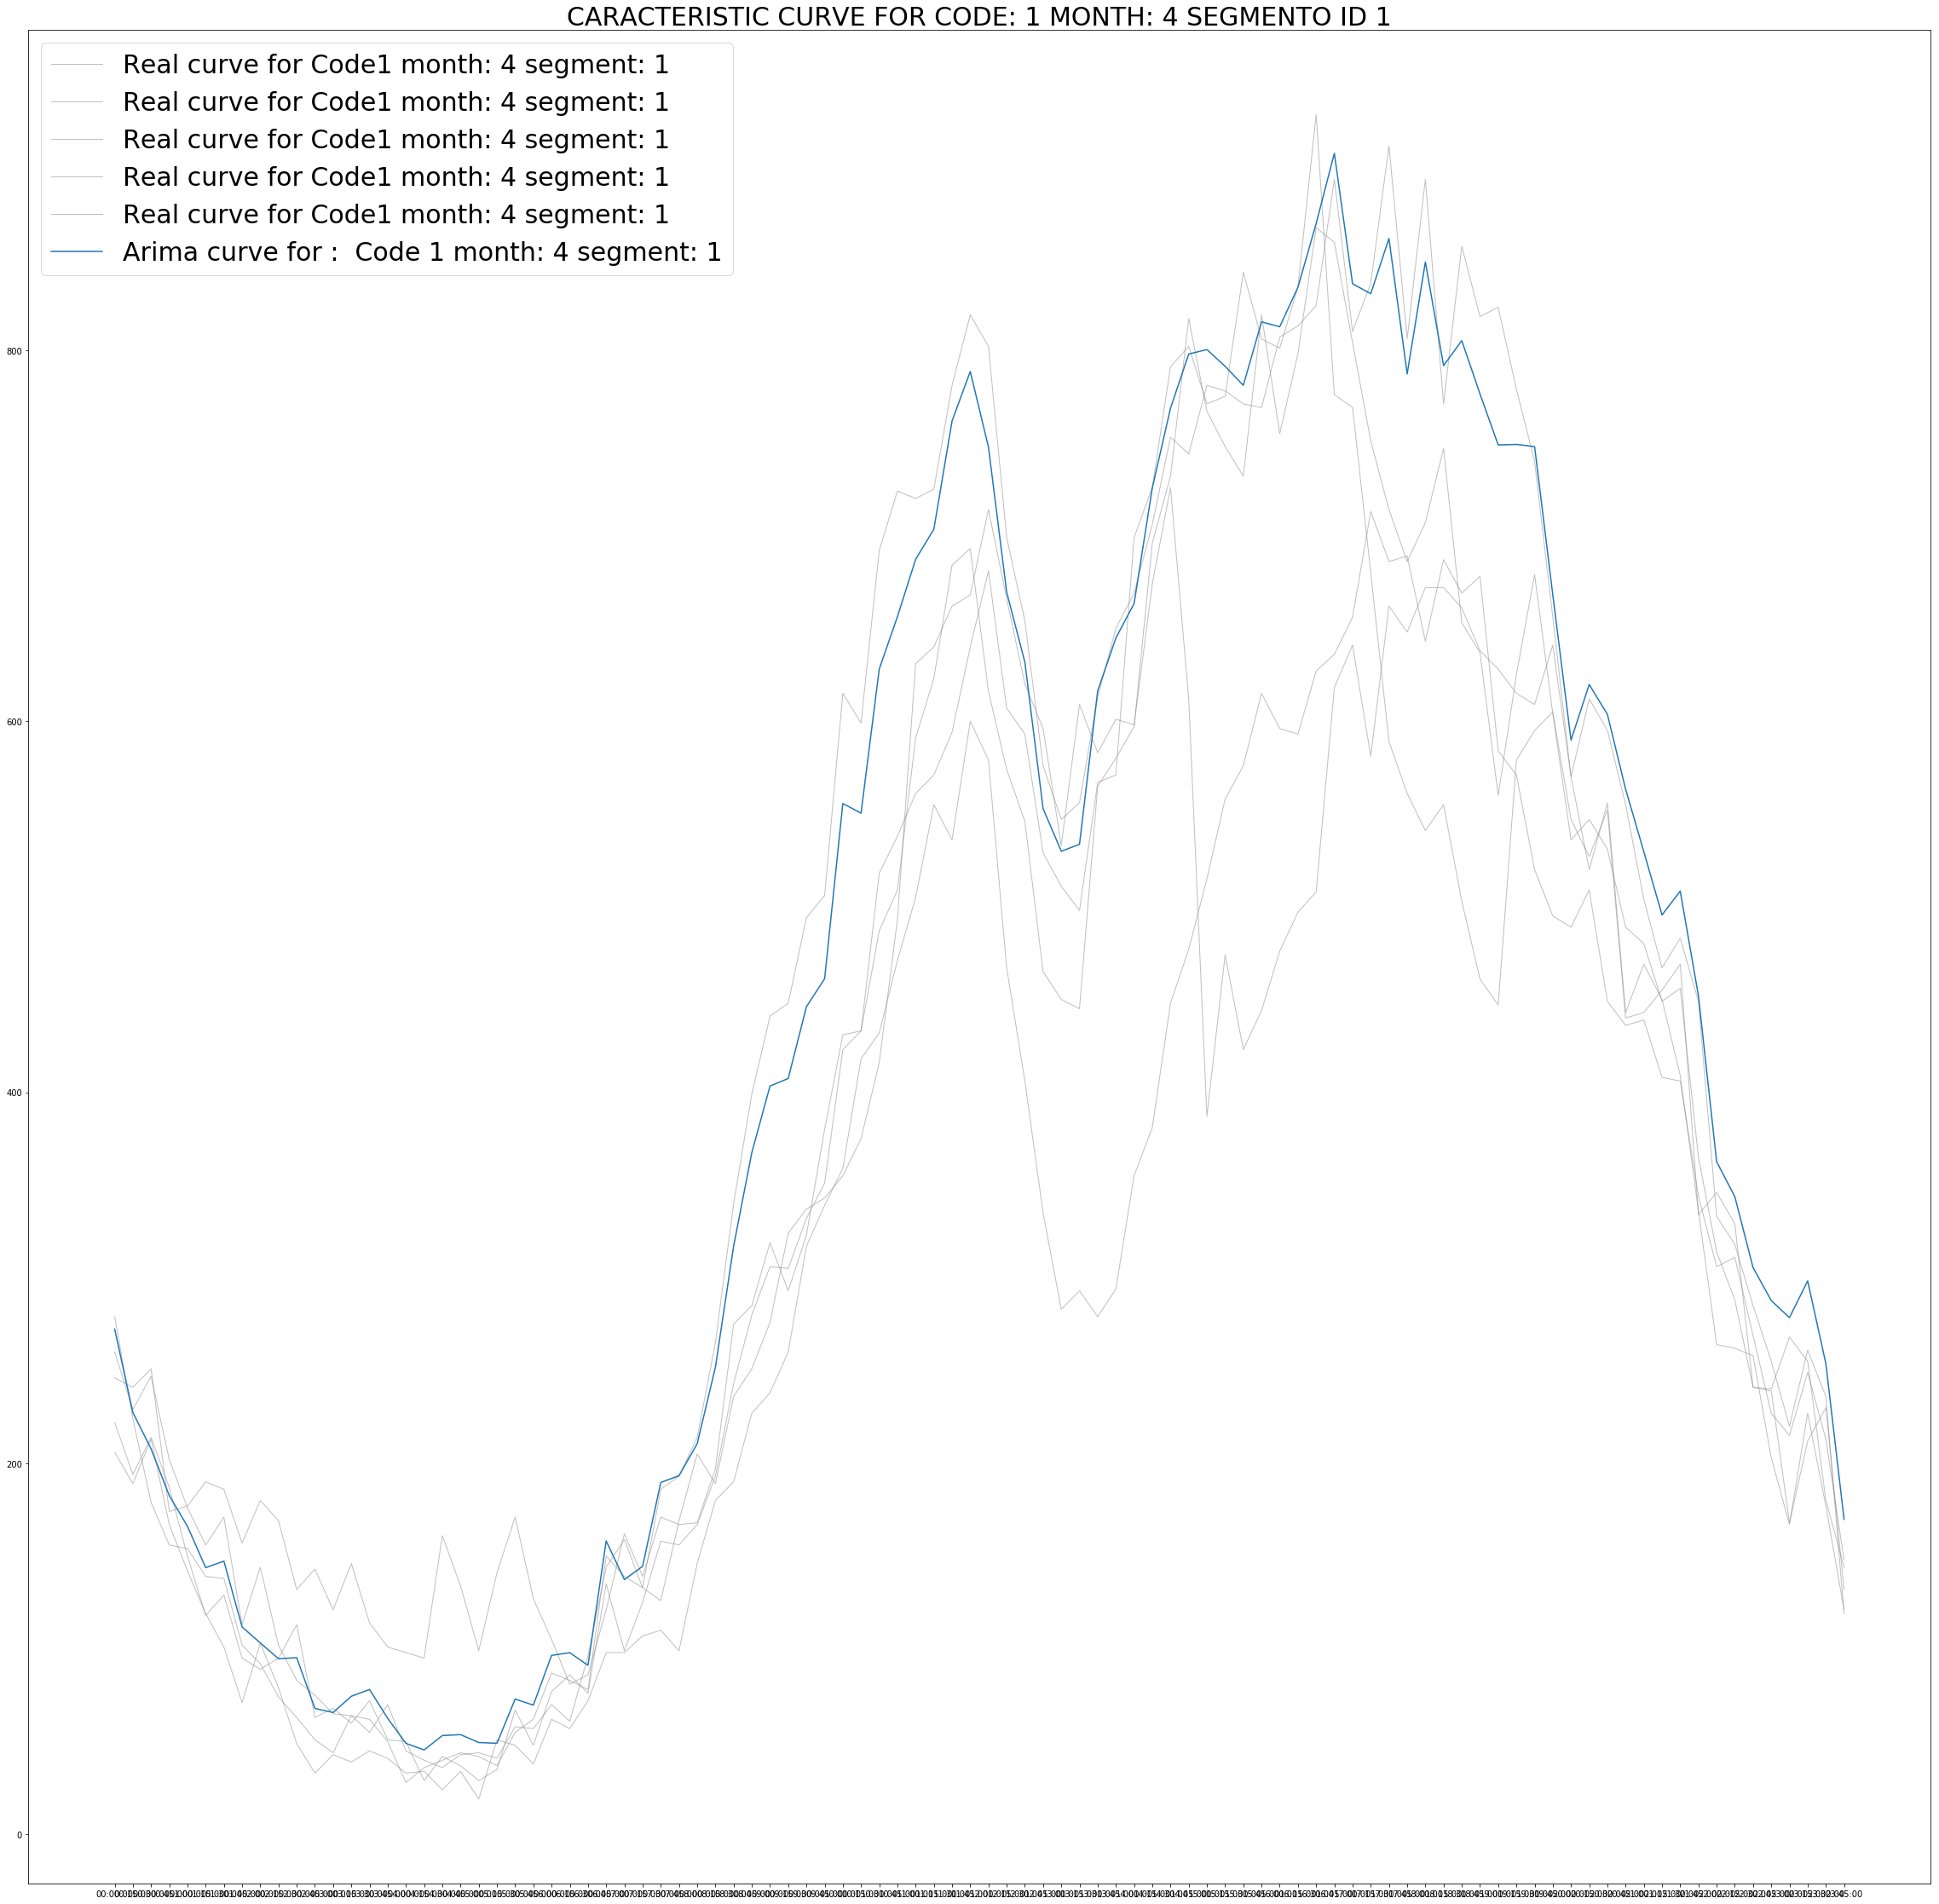

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,40))
plt.title('CARACTERISTIC CURVE FOR CODE: ' + str(code_i) + ' MONTH: ' + str(month_i) + ' SEGMENTO ID ' + str(seg_id) ,  fontsize=30)
step=0
for i in range(0,len(df_train_start.FECHA.dt.day.unique())):
    plt.plot(df_train_start.TIME[step:step+96], df_train_start.TOTAL_VEHICULOS[step:step+96], marker='', label=str("Real curve for Code" + str(code_i) + ' month: ' + str(month_i) + ' segment: ' + str(seg_id)), color='grey', linewidth=1, alpha=0.5)
    step=step+96
plt.plot(df_train_start.TIME[0:96], y_hat_avg, marker='', label='Arima curve for :  Code ' + str(code_i) + ' month: ' + str(month_i) + ' segment: ' + str(seg_id))
plt.legend(loc='best',  fontsize=30)
plt.show()

### Generate model_data.csv with the generalized curve extracted with each model

Estructura de model_data.csv

- MODELO: Modelo con el que se ha calculado la curva patron REF_ARIMA .... X (Model)
- ID_SEGMENT: Segmento id para el que se ha calculado el modelo
- MES: Mes para el que se ha calculado el modelo
- COD_LABORALIDAD: Codigo de laboralidad para el cual se ha calculado el modelo
- TIME: El timestamp con formato HH:MM:SS (diario)
- TOTAL_VEHICULOS: Valor asociado a un time dentro del dia patron con cod_laboralidad X, segmento Y, mes Z

In [38]:
sarimax_model_data_dict = {'TIME':[], 'ID_SEGMENT':[], 'MES':[], 'COD_LABORALIDAD': [], 'TOTAL_VEHICULOS': []}

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import os 

MODEL_NAME =  'Sarimax'

#segments=[1]
months=[6,7,8,9,10,11,12,1,2,3,4,5]#,4,5,6]
#codes=[2]

processed_segs=[]
processed_months=[]
processed_codes=[]

save_iter=0
reach_checkpoint=1
i_part=0

for month_i in months:#df_training_sets['MES'].unique(): # Months 
    index_values=None
    training_values=None
    y_hat_avg=None
    exp_fit1=None
    df_train=None
    
    # update iterations
    save_iter=save_iter+1
        
    for seg_id in df_training_sets['ID_SEGMENT'].unique(): # Segment
        
        for code_i in df_training_sets['COD_LABORALIDAD'].unique(): # All codes present
            df_train = df_training_sets.loc[(df_training_sets.MES==int(month_i))&(df_training_sets.ID_SEGMENT==int(seg_id))&(df_training_sets.COD_LABORALIDAD==int(code_i))]['TRAINING_SET'].iloc[0]

            # Training cleaning
            df_train.drop_duplicates(subset=['FECHA', 'TOTAL_VEHICULOS'], keep='first', inplace=True)
            
            # Train exponential smoothing models
            training_values = df_train.TOTAL_VEHICULOS

            arima_fit = sm.tsa.statespace.SARIMAX(np.asarray(training_values), trend='ct', order=(1, 1, 1), seasonal_order=(1, 1, 0, 96), enforce_stationarity=False, enforce_invertibility=False).fit()
            y_hat_avg = arima_fit.forecast(steps=96)
            
            # Fill model_data_dict with the model curve
            sarimax_model_data_dict['ID_SEGMENT'].extend([int(seg_id)]*96)
            sarimax_model_data_dict['MES'].extend([int(month_i)]*96)
            sarimax_model_data_dict['COD_LABORALIDAD'].extend([int(code_i)]*96)
            sarimax_model_data_dict['TIME'].extend(df_train.TIME[0:96])
            sarimax_model_data_dict['TOTAL_VEHICULOS'].extend(y_hat_avg.astype(int))
            
            # checkpoint info
            processed_segs.append(int(seg_id))
            processed_months.append(int(month_i))
            processed_codes.append(int(code_i))
            
            arima_fit=None

    if save_iter >= reach_checkpoint:
        df_sarimax_model = pd.DataFrame(sarimax_model_data_dict)
        df_sarimax_model.to_csv(os.path.join('sarimax', str(i_part) + "_" + MODEL_NAME + ".csv"), sep=";", index=False)

        print("Saving results.... File part: "+ str(i_part)  )
        print("Processed segments: " +  str(set(processed_segs)))
        print("Processed months: " +  str(set(processed_months)))
        print("Processed codes: " +  str(set(processed_codes)))
        processed_codes=[]
        i_part=i_part+1

        # clean variables
        df_sarimax_model = None
        save_iter=0
        sarimax_model_data_dict = {'TIME':[], 'ID_SEGMENT':[], 'MES':[], 'COD_LABORALIDAD': [], 'TOTAL_VEHICULOS': []}

C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWa

C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWa

Saving results.... File part: 0
Processed segments: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20}
Processed months: {6}
Processed codes: {1, 2, 3, 4, 5, 6, 7}


C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWa

C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWa

Saving results.... File part: 1
Processed segments: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20}
Processed months: {6, 7}
Processed codes: {1, 2, 3, 4, 5, 6, 7}


C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWa

C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Saving results.... File part: 2
Processed segments: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20}
Processed months: {8, 6, 7}
Processed codes: {1, 2, 3, 4, 5, 6, 7}


C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWa

C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWa

Saving results.... File part: 3
Processed segments: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20}
Processed months: {8, 9, 6, 7}
Processed codes: {1, 2, 3, 4, 5, 6, 7}


C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWa

Saving results.... File part: 4
Processed segments: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20}
Processed months: {6, 7, 8, 9, 10}
Processed codes: {1, 2, 3, 4, 5, 6, 7}


C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWa

C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWa

Saving results.... File part: 5
Processed segments: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20}
Processed months: {6, 7, 8, 9, 10, 11}
Processed codes: {1, 2, 3, 4, 5, 6, 7}


C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWa

C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWa

Saving results.... File part: 6
Processed segments: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20}
Processed months: {6, 7, 8, 9, 10, 11, 12}
Processed codes: {1, 2, 3, 4, 5, 6, 7}


C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWa

C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWa

Saving results.... File part: 7
Processed segments: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20}
Processed months: {1, 6, 7, 8, 9, 10, 11, 12}
Processed codes: {1, 2, 3, 4, 5, 6, 7}


C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWa

C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\yhoz\AppData\R

Saving results.... File part: 8
Processed segments: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20}
Processed months: {1, 2, 6, 7, 8, 9, 10, 11, 12}
Processed codes: {1, 2, 3, 4, 5, 6, 7}


C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWa

Saving results.... File part: 9
Processed segments: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20}
Processed months: {1, 2, 3, 6, 7, 8, 9, 10, 11, 12}
Processed codes: {1, 2, 3, 4, 5, 6, 7}


C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWa

C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWa

Saving results.... File part: 10
Processed segments: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20}
Processed months: {1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12}
Processed codes: {1, 2, 3, 4, 5, 6, 7}


C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWa

C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWa

Saving results.... File part: 11
Processed segments: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20}
Processed months: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}
Processed codes: {1, 2, 3, 4, 5, 6, 7}


In [46]:
df_t = df_training_sets.loc[(df_training_sets.MES==int(3))&(df_training_sets.ID_SEGMENT==int(9))&(df_training_sets.COD_LABORALIDAD==int(3))]['TRAINING_SET'].iloc[0]


In [47]:
df_t.TOTAL_VEHICULOS.shape

(384,)

In [49]:
df_train_start.TOTAL_VEHICULOS.shape

(480,)